# Лекция 11. Нелинейные модели для регрессии

In [5]:
pip show tensorflow

Name: tensorflow
Version: 2.0.0a0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\hp\anaconda3\lib\site-packages
Requires: termcolor, six, tb-nightly, absl-py, protobuf, keras-preprocessing, numpy, wheel, astor, tf-estimator-nightly, google-pasta, grpcio, keras-applications, gast
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show numpy

Name: numpy
Version: 1.20.1
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: c:\users\hp\anaconda3\lib\site-packages
Requires: 
Required-by: xgboost, xarray, tifffile, thinc, Theano, tensorflow, tensorboard, tb-nightly, tables, statsmodels, spacy, semopy, seaborn, scipy, scikit-surprise, scikit-learn, scikit-image, PyWavelets, pytest-arraydiff, pyLDAvis, pyerfa, py-artm, pingouin, Pattern, patsy, pandas, opt-einsum, numexpr, numba, mlxtend, mlens, mkl-random, mkl-fft, matplotlib, lightgbm, Keras, Keras-Preprocessing, Keras-Applications, imageio, imagecodecs, h5py, gensim, factor-analyzer, DESlib, Bottleneck, bokeh, blis, bkcharts, astropy, bigartm10
Note: you may need to restart the kernel to use updated packages.


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Импорт библиотек
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import euclidean_distances
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import optimizers
from keras import initializers
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [9]:
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

## Метод kNN для регрессии (прогнозирования признака в метрической шкале)

Теория: 
* https://www.cs.cmu.edu/~./awm/tutorials/mbl08.pdf
* Андреас Мюллер, Сара Гвидо. Введение в машинное обучение с помощью Python

Существует также регрессионный вариант алгоритма $k$ ближайших соседей. Начнем с варианта рассмотрения одного ближайшего соседа. Воспользуемся искусственно созданным набором данных wave. В приведенном ниже примере были добавлены три точки тестового набора, представленные на диаграмме в виде зеленых (светлых) звездочек, расположенных по оси $x$. Прогноз по алгоритмус использованием одного соседа - это целевое значение ближайшего соседа. На рисунке прогнозы показаны в виде синих (темных) звездочек.

In [10]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

In [11]:
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
cm_cycle = ListedColormap(['#0000aa', '#ff5050', '#50ff50', '#9040a0', '#fff000'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

In [12]:
def plot_knn_regression(n_neighbors=1):
    X, y = make_wave(n_samples=40)
    X_test = np.array([[-1.5], [0.9], [1.5]])

    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure(figsize=(10, 6))

    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = reg.predict(X_test)

    for x, y_, neighbors in zip(X_test, y_pred, closest.T):
        for neighbor in neighbors[:n_neighbors]:
                plt.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                          head_width=0, fc='k', ec='k')

    train, = plt.plot(X, y, 'o', c=cm3(0))
    test, = plt.plot(X_test, -3 * np.ones(len(X_test)), '*', c=cm3(2),
                     markersize=20)
    pred, = plt.plot(X_test, y_pred, '*', c=cm3(0), markersize=20)
    plt.vlines(X_test, -3.1, 3.1, linestyle="--")
    plt.legend([train, test, pred],
               ["training data/target", "test data", "test prediction"],
               ncol=3, loc=(.1, 1.025))
    plt.ylim(-3.1, 3.1)
    plt.xlabel("Feature")
    plt.ylabel("Target")

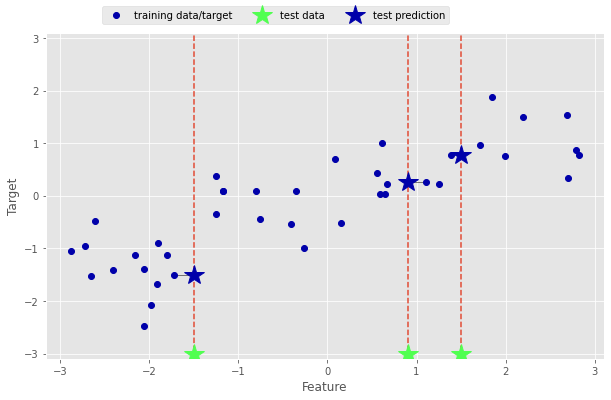

In [13]:
plot_knn_regression(n_neighbors=1)

И снова для метода регрессии мы можем использовать большее количество ближайших соседей. При использовании нескольких ближайших соседей прогнозом становится среднее значение соответствующих соседей.

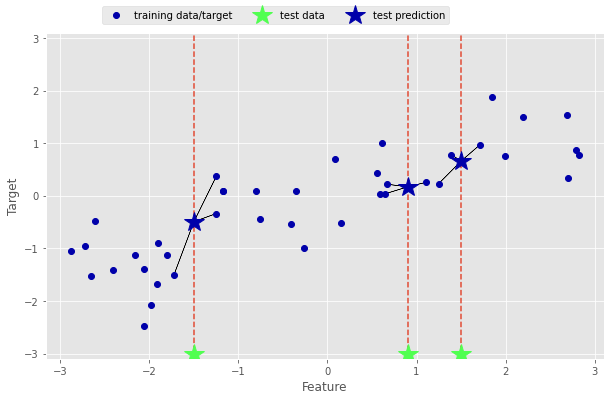

In [14]:
plot_knn_regression(n_neighbors=3)

Алгоритм регрессии k ближайших соседей реализован в классе KNeighborsRegressor. Он используется точно так же, как класс KNeighborsClassifier.

In [15]:
X, y = make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

А теперь получим прогнозы для тестового набора.

In [16]:
print("Прогнозы для тестового набора:\n", reg.predict(X_test))

Прогнозы для тестового набора:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Кроме того, мы можем оценить качество модели с помощью метода score, который для регрессионных моделей возвращает значение R^2, известный также как коэффициент детерминации, является показателем качества регрессионной модели и принимает значения от 0 до 1. Значение 1 соответствует идеальной прогнозирующей способности, а значение 0 соответствует константе модели, которая лишь предсказывает среднее значение ответов в обучающем наборе, y_train.

In [17]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


В данном случае значение коэффициента R^2 составляет 0.83, что указывает на относительно хорошее качество подгонки модели.

#### Анализ модели KNeighborsRegressor

Применительно к нашему одномерному массиву данных мы можем увидеть прогнозы для всех возможных значений признаков. Для этого мы создаем тестовый набор данных и визуализируем полученные линии прогнозов. Результат представлен на рисунке ниже.

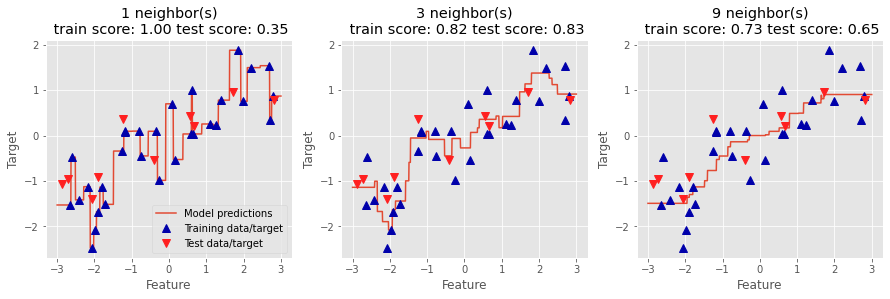

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Как видно на графике, при использовании лишь одного соседа каждая точка обучающего набора имеет очевидное влияние на прогнозы, и предсказанные значения проходят через все точки данных. Это приводит к очень неустойчивым прогнозам. Увеличение числа соседей ведет к получению более сглаженных прогнозов, но при этом снижается правильность подгонки модели к обучающим данным.

## Нейронные сети

Взято у В.Л. Аббакумова

### Прогнозирование сорта вина

In [19]:
# Импорт обучающей выборки
wine = pd.read_csv('Wine.txt', sep='\t', header=0)

In [20]:
wine.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [21]:
wine['Desired1(3)'].value_counts(normalize=True)

2    0.398876
0    0.331461
1    0.269663
Name: Desired1(3), dtype: float64

In [22]:
#  Предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = wine['Desired1(3)']
# Предикторы - таблица X
X = wine.drop('Desired1(3)', axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345,
                                                    # доля объёма тестового множества
                                                    test_size=0.33)

In [24]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [25]:
# Больше 2-х классов
# Классы не упорядочены
y_train_bin = np_utils.to_categorical(y_train)

y_test_bin = np_utils.to_categorical(y_test)

In [26]:
y_train_bin[0:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [27]:
# Creating a model
model = Sequential()
model.add(Dense(9, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu', ))
model.add(Dense(3, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training a model
model.fit(X_train, y_train_bin, epochs=300, batch_size=10)

Epoch 1/300
119/119 [==============================] - 0s 2ms/step - loss: 5.0828 - accuracy: 0.4454
Epoch 2/300
119/119 [==============================] - 0s 101us/step - loss: 3.0213 - accuracy: 0.5042
Epoch 3/300
119/119 [==============================] - 0s 101us/step - loss: 2.3628 - accuracy: 0.4454
Epoch 4/300
119/119 [==============================] - 0s 68us/step - loss: 1.8558 - accuracy: 0.5714
Epoch 5/300
119/119 [==============================] - 0s 67us/step - loss: 1.4220 - accuracy: 0.5378
Epoch 6/300
119/119 [==============================] - 0s 101us/step - loss: 1.2777 - accuracy: 0.5462
Epoch 7/300
119/119 [==============================] - 0s 101us/step - loss: 1.0636 - accuracy: 0.5714
Epoch 8/300
119/119 [==============================] - 0s 67us/step - loss: 0.9936 - accuracy: 0.6387
Epoch 9/300
119/119 [==============================] - 0s 101us/step - loss: 0.8990 - accuracy: 0.6218
Epoch 10/300
119/119 [==============================] - 0s 67us/step - loss: 0

In [28]:
# Уточним модель - model2

model2 = Sequential()
model2.add(Dense(9, input_dim=13, activation='relu'))
model2.add(Dense(10, activation='relu' ))
model2.add(Dense(3, activation='softmax'))

# Compiling model
sgd2 = optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.8, nesterov=True)
model2.compile(loss='categorical_crossentropy', optimizer=sgd2, metrics=['accuracy'])

#  model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training a model
model2.fit(X_train, y_train_bin, epochs=300, batch_size=10)

Epoch 1/300
119/119 [==============================] - 0s 672us/step - loss: 3921.4850 - accuracy: 0.2689
Epoch 2/300
119/119 [==============================] - 0s 67us/step - loss: 1.0935 - accuracy: 0.4118
Epoch 3/300
119/119 [==============================] - 0s 64us/step - loss: 1.0879 - accuracy: 0.4118
Epoch 4/300
119/119 [==============================] - 0s 67us/step - loss: 1.0872 - accuracy: 0.4118
Epoch 5/300
119/119 [==============================] - 0s 67us/step - loss: 1.0855 - accuracy: 0.4118
Epoch 6/300
119/119 [==============================] - 0s 67us/step - loss: 1.0843 - accuracy: 0.4118
Epoch 7/300
119/119 [==============================] - 0s 68us/step - loss: 1.0850 - accuracy: 0.4118
Epoch 8/300
119/119 [==============================] - 0s 67us/step - loss: 1.0842 - accuracy: 0.4118
Epoch 9/300
119/119 [==============================] - 0s 71us/step - loss: 1.0850 - accuracy: 0.4118
Epoch 10/300
119/119 [==============================] - 0s 67us/step - loss: 1

In [29]:
# evaluate the model
scores = model2.evaluate(X_test, y_test_bin)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

59/59 [==============================] - 0s 542us/step

Accuracy: 37.29%


In [30]:
# calculate predictions
predictions = model2.predict(X_test)

In [31]:
# Прогноз в 3-х столбцах - вероятность принадлежать каждому из 3-х сортов
print(predictions[0:5])

[[0.31957838 0.26915225 0.41126934]
 [0.31957838 0.26915225 0.41126934]
 [0.31957838 0.26915225 0.41126934]
 [0.31957838 0.26915225 0.41126934]
 [0.31957838 0.26915225 0.41126934]]


In [32]:
# Уточним модель - model3

# model3 = Sequential()
# model3.add(Dense(9, input_dim=13, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
# model3.add(Dense(10, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros' ))
# model3.add(Dense(3, activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros'))

init_2 = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=12345)
init_3 = initializers.Constant(value = 1e-3)

model3 = Sequential()
model3.add(Dense(9, input_dim=13, activation='relu', kernel_initializer=init_2, bias_initializer=init_3))
model3.add(Dense(10, activation='relu', kernel_initializer=init_2, bias_initializer=init_3 ))
model3.add(Dense(3, activation='softmax', kernel_initializer=init_2, bias_initializer=init_3))

#  kernel_initializer='random_uniform', bias_initializer='zeros'))

# Compiling model
sgd2 = optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.8, nesterov=True)
model3.compile(loss='categorical_crossentropy', optimizer=sgd2, metrics=['accuracy'])

# Training a model
model3.fit(X_train, y_train_bin, epochs=300, batch_size=10)

Epoch 1/300
119/119 [==============================] - 0s 627us/step - loss: 1.1211 - accuracy: 0.3613
Epoch 2/300
119/119 [==============================] - 0s 103us/step - loss: 1.0894 - accuracy: 0.4118
Epoch 3/300
119/119 [==============================] - 0s 121us/step - loss: 1.0874 - accuracy: 0.4118
Epoch 4/300
119/119 [==============================] - 0s 101us/step - loss: 1.0871 - accuracy: 0.4118
Epoch 5/300
119/119 [==============================] - 0s 67us/step - loss: 1.0852 - accuracy: 0.4118
Epoch 6/300
119/119 [==============================] - 0s 67us/step - loss: 1.0848 - accuracy: 0.4118
Epoch 7/300
119/119 [==============================] - 0s 101us/step - loss: 1.0852 - accuracy: 0.4118
Epoch 8/300
119/119 [==============================] - 0s 67us/step - loss: 1.0864 - accuracy: 0.4118
Epoch 9/300
119/119 [==============================] - 0s 67us/step - loss: 1.0844 - accuracy: 0.4118
Epoch 10/300
119/119 [==============================] - 0s 101us/step - loss:

In [33]:
# evaluate the model
scores = model3.evaluate(X_test, y_test_bin)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

59/59 [==============================] - 0s 474us/step

Accuracy: 37.29%


In [34]:
# calculate predictions
predictions_3 = model3.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [35]:
print(predictions_3[0:5])

[[0.3207825  0.26955664 0.40966085]
 [0.3207825  0.26955664 0.40966085]
 [0.3207825  0.26955664 0.40966085]
 [0.3207825  0.26955664 0.40966085]
 [0.3207825  0.26955664 0.40966085]]


### Прогнозирование продаж автомобилей

In [36]:
# Импорт обучающей выборки
sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', sep=';', header=0, parse_dates=[0])

In [37]:
#  Знакомимся с данными
sales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [38]:
#  Знакомимся с данными
sales.shape

(108, 2)

In [39]:
#  Знакомимся с данными
sales.tail()

,Month,Monthly car sales in Quebec 1960-1968
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


<AxesSubplot:>

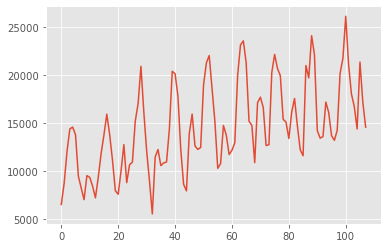

In [40]:
#  График
sales.iloc[:,1].plot()

In [41]:
# Преобразуем данные
sales_2 = pd.DataFrame()

for i in range(12,0,-1):
    sales_2['t-'+str(i)] = sales.iloc[:,1].shift(i)

sales_2['t'] = sales.iloc[:,1].values

print(sales_2.head(13))

      t-12    t-11     t-10      t-9      t-8      t-7      t-6      t-5  \
0      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5      NaN     NaN      NaN      NaN      NaN      NaN      NaN   6550.0   
6      NaN     NaN      NaN      NaN      NaN      NaN   6550.0   8728.0   
7      NaN     NaN      NaN      NaN      NaN   6550.0   8728.0  12026.0   
8      NaN     NaN      NaN      NaN   6550.0   8728.0  12026.0  14395.0   
9      NaN     NaN      NaN   6550.0   8728.0  12026.0  14395.0  14587.0   
10     NaN     NaN   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0   
11     NaN  6550.0   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0   
12  6550.0  

In [42]:
#  Отрезаем первые 12 строк
sales_4 = sales_2[12:]

sales_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237
13,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374
14,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837
15,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
16,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926


In [43]:
# Предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = sales_4['t']
# Предикторы - таблица X
X = sales_4.drop('t', axis=1)

In [44]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:91]
y_train = y[:91]
X_test  = X[91:]
y_test  = y[91:]

In [45]:
#  Все хорошо?
print(sales_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(96, 13)
(91, 12)
(91,)
(5, 12)
(5,)


In [46]:
#  Все хорошо?
print(X_train.head(5))

       t-12     t-11     t-10      t-9      t-8      t-7     t-6     t-5  \
12   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0  9498.0  8251.0   
13   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0  8251.0  7049.0   
14  12026.0  14395.0  14587.0  13791.0   9498.0   8251.0  7049.0  9545.0   
15  14395.0  14587.0  13791.0   9498.0   8251.0   7049.0  9545.0  9364.0   
16  14587.0  13791.0   9498.0   8251.0   7049.0   9545.0  9364.0  8456.0   

       t-4     t-3      t-2      t-1  
12  7049.0  9545.0   9364.0   8456.0  
13  9545.0  9364.0   8456.0   7237.0  
14  9364.0  8456.0   7237.0   9374.0  
15  8456.0  7237.0   9374.0  11837.0  
16  7237.0  9374.0  11837.0  13784.0  


In [47]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [48]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)

Epoch 1/300
91/91 [==============================] - 0s 938us/step - loss: 23148654.4396 - mean_absolute_percentage_error: 29.7922
Epoch 2/300
91/91 [==============================] - 0s 44us/step - loss: 20885906.7473 - mean_absolute_percentage_error: 27.8887
Epoch 3/300
91/91 [==============================] - 0s 88us/step - loss: 19214919.8901 - mean_absolute_percentage_error: 26.2330
Epoch 4/300
91/91 [==============================] - 0s 44us/step - loss: 17425533.8462 - mean_absolute_percentage_error: 24.7153
Epoch 5/300
91/91 [==============================] - 0s 44us/step - loss: 15662320.3077 - mean_absolute_percentage_error: 23.2378
Epoch 6/300
91/91 [==============================] - 0s 0us/step - loss: 14211442.0110 - mean_absolute_percentage_error: 22.0708
Epoch 7/300
91/91 [==============================] - 0s 44us/step - loss: 12973138.9670 - mean_absolute_percentage_error: 21.1837
Epoch 8/300
91/91 [==============================] - 0s 44us/step - loss: 11893909.1319 - 

In [49]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

5/5 [==============================] - 0s 4ms/step

MAPE: 10.27%


In [50]:
# Вычисляем прогноз
predictions = model.predict(X_test)

In [51]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [52]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(91, 12)
(91,)
(5, 12)
(5,)


In [53]:
#   было 108 наблюдений

#   отбросили 12 стало 96
#   train 91
#   test  5

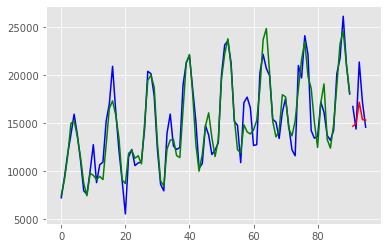

In [54]:
#   График с результатами
#   numpy.arange([start, ]stop, [step, ]dtype=None)¶
x2 = np.arange(0, 91, 1)
x3 = np.arange(91, 96, 1)
plt.plot(x2, y_train, color='blue')
plt.plot(x2, predictions_train, color='green')
plt.plot(x3, y_test, color='blue')
plt.plot(x3, predictions, color='red')

### Прогнозирование объёма пассажироперевозок

In [55]:
# Импорт обучающей выборки
ser_g = pd.read_csv('series_g.csv', sep=';', header=0)

In [56]:
#  Знакомимся с данными
ser_g.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [57]:
#  Знакомимся с данными
ser_g.shape

(144, 2)

In [58]:
#  Знакомимся с данными
ser_g.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


<AxesSubplot:>

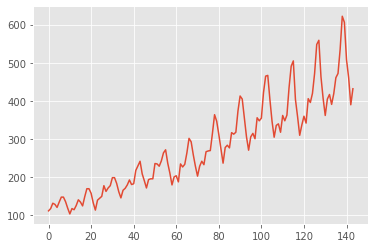

In [59]:
#  График
ser_g.iloc[:,1].plot()

In [60]:
#  Надо прогнозировать логарифм, т.к. нейронные сети плохо работают с мультипликативными тренд-сезонными моделями
ser_g['log_y'] = np.log10(ser_g['series_g'])

Text(0, 0.5, 'log10 от тысяч человек')

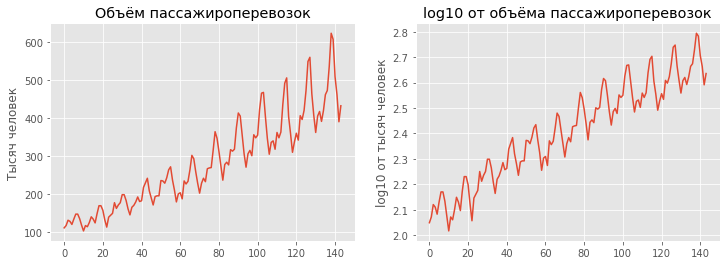

In [61]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ser_g['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(ser_g['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')

In [62]:
# Преобразуем данные

ser_g_2 = pd.DataFrame()

for i in range(12,0,-1):
    ser_g_2['t-'+str(i)] = ser_g.iloc[:,2].shift(i)

ser_g_2['t'] = ser_g.iloc[:,2].values

print(ser_g_2.head(13))

        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN       NaN       NaN       NaN  2.049218   
7        NaN       NaN       NaN       NaN       NaN  2.049218  2.071882   
8        NaN       NaN       NaN       NaN  2.049218  2.071882  2.120574   
9        NaN       NaN       NaN  2.049218  2.071882  2.120574  2.110590   
10       NaN       NaN  2.049218  2.071882  2.120574  2.110590  2.082785   
11       NaN  2.049218  2.071882  2.120574  2.110590  2.082785  2.130334   
12  2.049218

In [63]:
#  Отрезаем первые 12 строк
ser_g_4 = ser_g_2[12:]

ser_g_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698
13,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371
14,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219
15,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334
16,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334,2.096910


In [64]:
#  предикторы и отклик разделяем
# Отклик  вектор y
y = ser_g_4['t']
# Предикторы - таблица X
X = ser_g_4.drop('t', axis=1)

In [65]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [66]:
#  Все хорошо?
print(ser_g_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(132, 13)
(120, 12)
(120,)
(12, 12)
(12,)


In [67]:
#  Все хорошо?
print(X_train.head(5))

        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
12  2.049218  2.071882  2.120574  2.110590  2.082785  2.130334  2.170262   
13  2.071882  2.120574  2.110590  2.082785  2.130334  2.170262  2.170262   
14  2.120574  2.110590  2.082785  2.130334  2.170262  2.170262  2.133539   
15  2.110590  2.082785  2.130334  2.170262  2.170262  2.133539  2.075547   
16  2.082785  2.130334  2.170262  2.170262  2.133539  2.075547  2.017033   

         t-5       t-4       t-3       t-2       t-1  
12  2.170262  2.133539  2.075547  2.017033  2.071882  
13  2.133539  2.075547  2.017033  2.071882  2.060698  
14  2.075547  2.017033  2.071882  2.060698  2.100371  
15  2.017033  2.071882  2.060698  2.100371  2.149219  
16  2.071882  2.060698  2.100371  2.149219  2.130334  


In [68]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [69]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)

Epoch 1/300
120/120 [==============================] - 0s 733us/step - loss: 11.7742 - mean_absolute_percentage_error: 141.9299
Epoch 2/300
120/120 [==============================] - 0s 33us/step - loss: 9.9124 - mean_absolute_percentage_error: 130.3214
Epoch 3/300
120/120 [==============================] - 0s 33us/step - loss: 8.4319 - mean_absolute_percentage_error: 120.1295
Epoch 4/300
120/120 [==============================] - 0s 33us/step - loss: 7.0314 - mean_absolute_percentage_error: 109.7158
Epoch 5/300
120/120 [==============================] - 0s 33us/step - loss: 5.7746 - mean_absolute_percentage_error: 99.4094
Epoch 6/300
120/120 [==============================] - 0s 33us/step - loss: 4.6704 - mean_absolute_percentage_error: 89.4116
Epoch 7/300
120/120 [==============================] - 0s 33us/step - loss: 3.7315 - mean_absolute_percentage_error: 79.8342
Epoch 8/300
120/120 [==============================] - 0s 33us/step - loss: 2.9267 - mean_absolute_percentage_error: 70

In [70]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

12/12 [==============================] - 0s 1ms/step

MAPE: 2.18%


In [71]:
# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [72]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [73]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 12)
(120,)
(12, 12)
(12,)


In [74]:
#   было 144 наблюдений
#   отбросили 12 стало 132
#   train 120
#   test  12

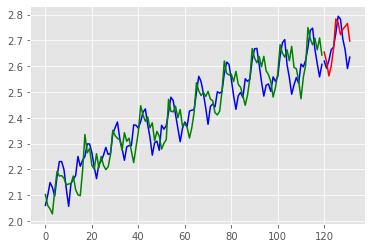

In [75]:
#   График с результатами
#   numpy.arange([start, ]stop, [step, ]dtype=None)
x2 = np.arange(0, 120, 1)
x3 = np.arange(120, 132, 1)
plt.plot(x2, y_train, color='blue')
plt.plot(x2, predictions_train, color='green')
plt.plot(x3, y_test, color='blue')
plt.plot(x3, predictions, color='red')

#   Внимание, недоделано!
#   Есть прогноз для логарифма, нет прогноза для исходного ряда.